In [2]:
import pandas as pd
import numpy as np
import re
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
alt.renderers.enable('colab')

RendererRegistry.enable('colab')

In [ ]:
# If working on Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


# Load Shipping and Review Data

In [7]:
##### READ ME #####
# The data on Git uses anonymized and truncated versions due to proprietary information.
# Outputs may differ from Colab data
################### 

# Load ReviewEmotion.xlsx file
# Method 1
__file__ = 'Review Emotion Prediction Jul 21 2022.xlsx'
__location__ = os.path.realpath(os.path.join(os.getcwd(), os.path.dirname(__file__),'..'))
print(__location__)
dfreview = pd.read_excel(f'{__location__}\data\\raw\{__file__}', sheet_name='review_emotions', header=0, converters={'Order ID':str})

# Method 2 - Load from local absolute directory 
#dfreview = pd.read_excel('C:\\Users\\User\\Python-Projects\\SIADS 697 Capstone Git Repo\\realtime_dreamer\\data\\raw\\Review Emotion Prediction Jul 21 2022.xlsx', sheet_name='review_emotions', header=0, converters={'Order ID':str})

# Method 3 - Load from Google Colab
#dfreview = pd.read_excel('/content/drive/My Drive/Realtime Dreamer/Sentiment Analysis/Review Emotion Prediction Jul 21 2022.xlsx', sheet_name='review_emotions', header=0, converters={'Order ID':str})

dfreview.head(2)

C:\Users\User\Python-Projects\SIADS 697 Capstone Git Repo\realtime_dreamer


,index,STT,Order ID,Review Content,Product,Rating,CMMF code,CAT,SUB-CAT,MODEL/DESC,Item Desc,Month report,YEAR-REPORT,TÃ¬nh tráº¡ng,Type 1 Level 1,good/bad,Type 1 Level 2,Type 2 Level 1,Type 2 Level 2,emotion,emotion.1
0,0,1,340561535754259,huong 27 thg 2 2022,[Sáº£n pháº©m má»i ra máº¯t] Ná»i chiÃªn khÃ...,5,7211004635,SDA,ACTI-FRY,EY111B15,Ná»i chiÃªn khÃ´ng dáº§u Tefal XL Ultra Fry E...,Feb,2022,KhÃ´ng cÃ³ thÃ´ng tin Review,NaN,NaN,NaN,NaN,NaN,neutral,neutral
1,1,2,337165042503458,"máy ép trái cây thì rất ok, ép rau thì kêu en ...","MÃ¡y Ã©p cháº­m trÃ¡i cÃ¢y TEFAL ZC150838, cÃ´...",5,7211003241,SDA,JUICER,ZC150838,MÃ¡y Ã©p trÃ¡i cÃ¢y ZC150838,Feb,2022,CÃ³ thÃ´ng tin Review,Quality,good,Tá»t,NaN,NaN,positive,positive


In [8]:
print('dfreview.shape', dfreview.shape)
dfreview = dfreview.rename(columns={'Order ID':'orderItemId'})
#dfreview['orderItemId'] = dfreview['orderItemId'].astype(float).astype(int).astype(str) # Uncomment on Google Colab, else will get strings with decimals if this line is excluded
dfreview.columns = dfreview.columns.str.strip()
dfreview.head()

dfreview.shape (23535, 21)


,index,STT,orderItemId,Review Content,Product,Rating,CMMF code,CAT,SUB-CAT,MODEL/DESC,Item Desc,Month report,YEAR-REPORT,TÃ¬nh tráº¡ng,Type 1 Level 1,good/bad,Type 1 Level 2,Type 2 Level 1,Type 2 Level 2,emotion,emotion.1
0,0,1,340561535754259,huong 27 thg 2 2022,[Sáº£n pháº©m má»i ra máº¯t] Ná»i chiÃªn khÃ...,5,7211004635,SDA,ACTI-FRY,EY111B15,Ná»i chiÃªn khÃ´ng dáº§u Tefal XL Ultra Fry E...,Feb,2022,KhÃ´ng cÃ³ thÃ´ng tin Review,NaN,NaN,NaN,NaN,NaN,neutral,neutral
1,1,2,337165042503458,"máy ép trái cây thì rất ok, ép rau thì kêu en ...","MÃ¡y Ã©p cháº­m trÃ¡i cÃ¢y TEFAL ZC150838, cÃ´...",5,7211003241,SDA,JUICER,ZC150838,MÃ¡y Ã©p trÃ¡i cÃ¢y ZC150838,Feb,2022,CÃ³ thÃ´ng tin Review,Quality,good,Tá»t,NaN,NaN,positive,positive
2,2,3,337555651119122,Tôn N. 27 thg 2 2022,"Bá» dao Tefal Comfort K221S244 15cm vÃ 12cm,...",5,2100121759,CW,KNIFE,K221S244,Bá» dao Tefal Comfort K221S244 15cm vÃ 12cm,Feb,2022,KhÃ´ng cÃ³ thÃ´ng tin Review,NaN,NaN,NaN,NaN,NaN,neutral,neutral
3,3,4,338847937578422,"dùng nồi rất thích, nhanh gọn và tiện . Chăm s...",Ná»i chiÃªn khÃ´ng dáº§u Äiá»n tá»­ XL 4.2L...,5,1510001458,SDA,ACTI-FRY,EY401D15,Ná»i chiÃªn khÃ´ng dáº§u EY401D15,Feb,2022,CÃ³ thÃ´ng tin Review,Service,NaN,CSKH,NaN,NaN,positive,positive
4,4,5,338806916033739,Lê H. 27 thg 2 2022,Bá» 2 cháº£o chá»ng dÃ­nh vÃ¢n ÄÃ¡ Tefal Na...,5,4200007335,CW,COMBO-CW,CCWCW2-04,"Bá» 2 Cháº£o chiÃªn, Cháº£o sÃ¢u lá»ng Tefal...",Feb,2022,KhÃ´ng cÃ³ thÃ´ng tin Review,NaN,NaN,NaN,NaN,NaN,neutral,neutral


In [10]:
# SHIPPING DF
# Load Shipping.xlsx
__file__ = 'Data-cleaned-shipping.csv'
__location__ = os.path.realpath(os.path.join(os.getcwd(), os.path.dirname(__file__),'..'))
dfship = pd.read_csv(f'{__location__}\data\\raw\{__file__}', converters={'orderItemId':int})

# Method 3 - Load from Google Colab
#dfship = pd.read_csv('/content/drive/My Drive/Realtime Dreamer/Predictive Modeling/Raw Data/Data-cleaned-shipping.csv', converters={'orderItemId':int})

# Order ID for Shipping.csv is incremented by 100,000 compared to Review.csv, ie. 
# Shipping.csv Order ID 270548084456787 == 
# Review.csv Order Id   270548084356787
#dfship = pd.read_csv('/content/drive/My Drive/Capstone/Data-cleaned-shipping.csv', converters={'orderItemId':int})


dfship['orderItemId'] = dfship['orderItemId'] - 100000
dfship['orderItemId'] = dfship['orderItemId'].astype(str)
dfship.head()

,productId,orderItemId,paidPrice,unitPrice,sellerDiscountTotal,createTime,shippingDays,canceledDays,shippingDistrict,shippingRegion,shippingFee,status,buyerFailedDeliveryReason,payMethod,month
0,512596106,273576369912503,384000,384000,NaN,31 Jan 2021 23:19,1,1,Quận 11,Southern_Southeast,6092,delivered,NaN,MIXEDCARD,1
1,700404651,273587525439381,170000,190000,-20000.0,31 Jan 2021 23:11,2,2,Thành Phố Huế,Central_North_Central,2600,delivered,NaN,MOMO_WALLET,1
2,878868949,273580341468094,2235000,2385000,-150000.0,31 Jan 2021 23:11,-1,0,Quận Bình Thạnh,Southern_Southeast,0,canceled,payment_issue,DEFAULT_METHOD,1
3,878868949,272791220868094,2205000,2385000,-180000.0,31 Jan 2021 23:10,2,2,Quận Bình Thạnh,Southern_Southeast,0,delivered,NaN,MIXEDCARD,1
4,804152294,272792014035890,499000,599000,-100000.0,31 Jan 2021 23:10,-1,0,Huyện Giao Thủy,North_RedRiver_Delta,139200,canceled,customer_change_decision,MOMO_WALLET,1


In [11]:
# MERGE NEW SHIPPING AND REVIEW DF 
df3 = pd.DataFrame()
df3 = pd.merge(dfship, dfreview, on='orderItemId',how='outer', indicator=True)
df3 = df3.set_index(['orderItemId'])
print(df3.shape)
df3.head()

(116334, 35)


,productId,paidPrice,unitPrice,sellerDiscountTotal,createTime,shippingDays,canceledDays,shippingDistrict,shippingRegion,shippingFee,status,buyerFailedDeliveryReason,payMethod,month,index,STT,Review Content,Product,Rating,CMMF code,CAT,SUB-CAT,MODEL/DESC,Item Desc,Month report,YEAR-REPORT,TÃ¬nh tráº¡ng,Type 1 Level 1,good/bad,Type 1 Level 2,Type 2 Level 1,Type 2 Level 2,emotion,emotion.1,_merge
orderItemId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
273576369912503,512596106.0,384000.0,384000.0,NaN,31 Jan 2021 23:19,1.0,1.0,Quận 11,Southern_Southeast,6092.0,delivered,NaN,MIXEDCARD,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
273587525439381,700404651.0,170000.0,190000.0,-20000.0,31 Jan 2021 23:11,2.0,2.0,Thành Phố Huế,Central_North_Central,2600.0,delivered,NaN,MOMO_WALLET,1.0,22390.0,22391.0,789498605 05 thg 2 2021,Cháº£o chiÃªn Tefal Light & Clean B2240595 26c...,5.0,2100111888,CW,FRY-PAN,B2240595,Cháº£o chiÃªn Tefal Light & Clean 26cm.,Feb,2021.0,KhÃ´ng cÃ³ thÃ´ng tin Review,NaN,NaN,NaN,NaN,NaN,neutral,neutral,both
273580341468094,878868949.0,2235000.0,2385000.0,-150000.0,31 Jan 2021 23:11,-1.0,0.0,Quận Bình Thạnh,Southern_Southeast,0.0,canceled,payment_issue,DEFAULT_METHOD,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
272791220868094,878868949.0,2205000.0,2385000.0,-180000.0,31 Jan 2021 23:10,2.0,2.0,Quận Bình Thạnh,Southern_Southeast,0.0,delivered,NaN,MIXEDCARD,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
272792014035890,804152294.0,499000.0,599000.0,-100000.0,31 Jan 2021 23:10,-1.0,0.0,Huyện Giao Thủy,North_RedRiver_Delta,139200.0,canceled,customer_change_decision,MOMO_WALLET,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [ ]:
# Uncomment to save as csv
#df3.to_csv('/content/drive/My Drive/Capstone/data-merged-shipping-review.csv')

# **Exploratory Data Analysis**

In [12]:
df3.describe()

,productId,paidPrice,unitPrice,sellerDiscountTotal,shippingDays,canceledDays,shippingFee,month,index,STT,Rating,YEAR-REPORT
count,1.095860e+05,1.095860e+05,1.095860e+05,9.113000e+04,109586.000000,109586.000000,109586.000000,109586.000000,23535.000000,23535.000000,23535.000000,23535.000000
mean,9.168165e+08,9.422242e+05,1.118695e+06,-2.122100e+05,3.455222,5.431597,3820.506014,7.252697,11767.000000,11768.000000,4.832420,2021.123688
std,2.429079e+08,1.122523e+06,1.120524e+06,2.601603e+05,6.321314,8.674031,18300.732890,3.214902,6794.113629,6794.113629,0.630351,0.329232
min,5.085265e+08,0.000000e+00,0.000000e+00,-3.989000e+06,-1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2021.000000
25%,7.699784e+08,1.000000e+03,3.590000e+05,-3.000000e+05,-1.000000,1.000000,0.000000,5.000000,5883.500000,5884.500000,5.000000,2021.000000
50%,8.788689e+08,4.640000e+05,6.760000e+05,-1.000000e+05,2.000000,3.000000,0.000000,8.000000,11767.000000,11768.000000,5.000000,2021.000000
75%,1.071274e+09,1.605650e+06,1.864000e+06,-4.750000e+04,5.000000,6.000000,0.000000,9.000000,17650.500000,17651.500000,5.000000,2021.000000
max,1.567247e+09,8.990000e+06,8.990000e+06,0.000000e+00,70.000000,153.000000,351500.000000,12.000000,23534.000000,23535.000000,5.000000,2022.000000


In [13]:
print('df3.shape', df3.shape)
print('Number of cols without ratings:', df3['Rating'].isna().sum())
df3.info()

df3.shape (116334, 35)
Number of cols without ratings: 92799
<class 'pandas.core.frame.DataFrame'>
Index: 116334 entries, 273576369912503 to 268244111808508
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   productId                  109586 non-null  float64 
 1   paidPrice                  109586 non-null  float64 
 2   unitPrice                  109586 non-null  float64 
 3   sellerDiscountTotal        91130 non-null   float64 
 4   createTime                 109586 non-null  object  
 5   shippingDays               109586 non-null  float64 
 6   canceledDays               109586 non-null  float64 
 7   shippingDistrict           109586 non-null  object  
 8   shippingRegion             109586 non-null  object  
 9   shippingFee                109586 non-null  float64 
 10  status                     109586 non-null  object  
 11  buyerFailedDeliveryReason  41235 non-null   object 

left_only     92799
both          16787
right_only     6748
Name: _merge, dtype: int64


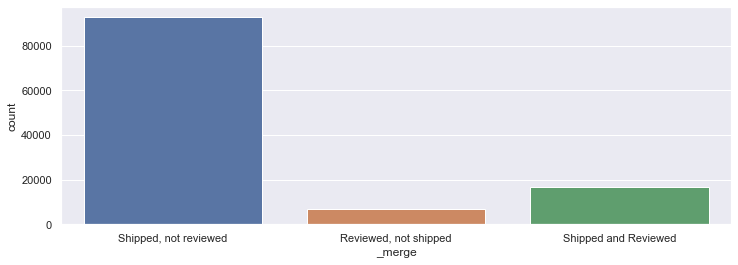

In [14]:
# Shipped and Reviewed Count
print(df3['_merge'].value_counts())

sns.set(rc = {'figure.figsize':(12,4)})
g = sns.countplot(data=df3, x='_merge')
g.set_xticklabels(['Shipped, not reviewed', 'Reviewed, not shipped', 'Shipped and Reviewed'])
plt.show()

5.0    21412
4.0     1156
3.0      472
1.0      359
2.0      136
Name: Rating, dtype: int64


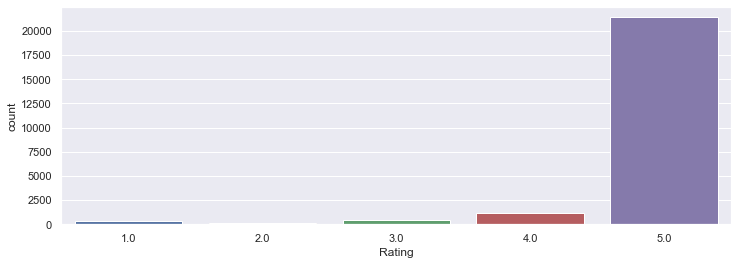

In [15]:
# Ratings Count
print(df3['Rating'].value_counts())

sns.set(rc = {'figure.figsize':(12,4)})
g = sns.countplot(data=df3, x='Rating')
plt.show()

# **Visualizations**

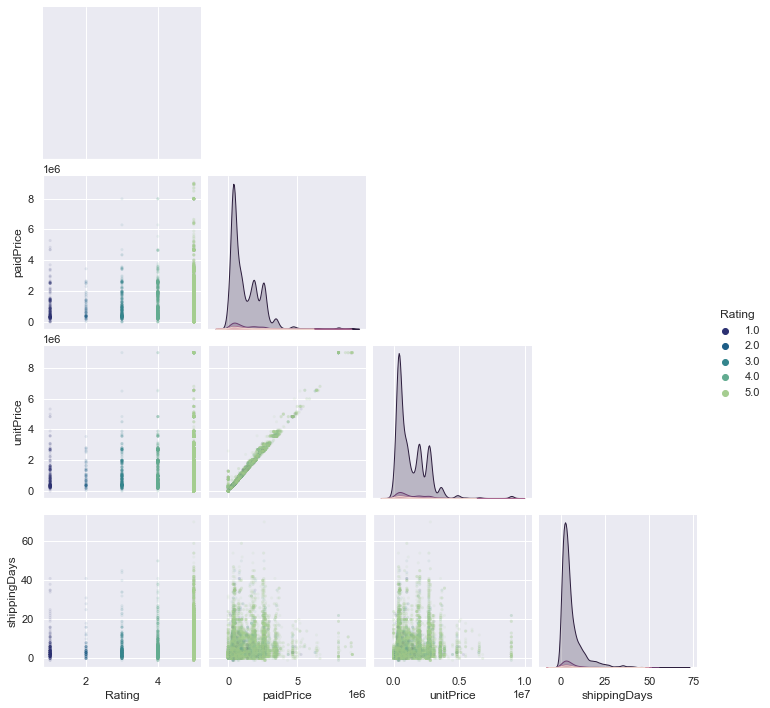

In [16]:
# Rating and Quantitative Data

sns.set(rc = {'figure.figsize':(16,8)})
sns.pairplot(
    data=df3.reset_index(),
    vars=['Rating', 'paidPrice', 'unitPrice', 'shippingDays'],
    hue='Rating',
    plot_kws=dict(marker=".", alpha=0.1, linewidth=0, palette='crest_r'),
    corner=True,
);

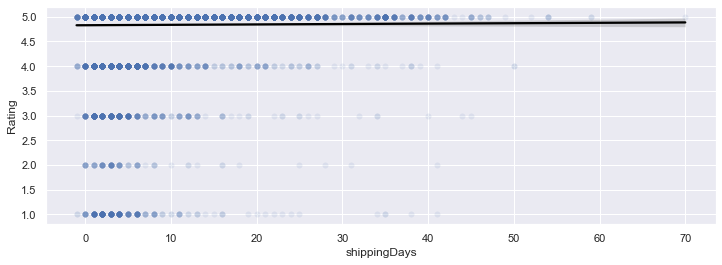

In [17]:
# Zooming in on Ratings and ShippingDays
sns.set(rc = {'figure.figsize':(12,4)})
sns.regplot(data=df3, x='shippingDays', y='Rating', fit_reg=True, ci=95,
            scatter_kws=dict(marker=",", alpha=0.1, linewidth=0),
            line_kws={"color": "black"}
            );

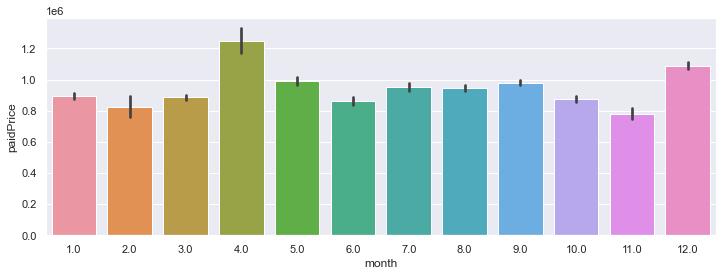

In [19]:
# Paid Price by Month
sns.set(rc = {'figure.figsize':(12,4)})
sns.barplot(data=df3, x='month', y='paidPrice');

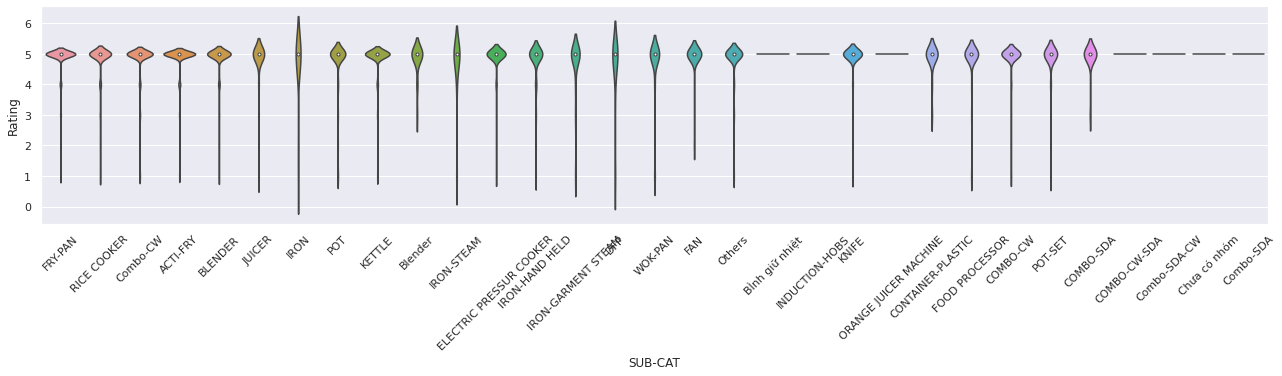

In [ ]:
# Ratings by Sub-categories
sns.set(rc = {'figure.figsize':(22,4)})
sns.violinplot(data=df3, x='SUB-CAT', y='Rating')
plt.xticks(rotation=45)
plt.show()

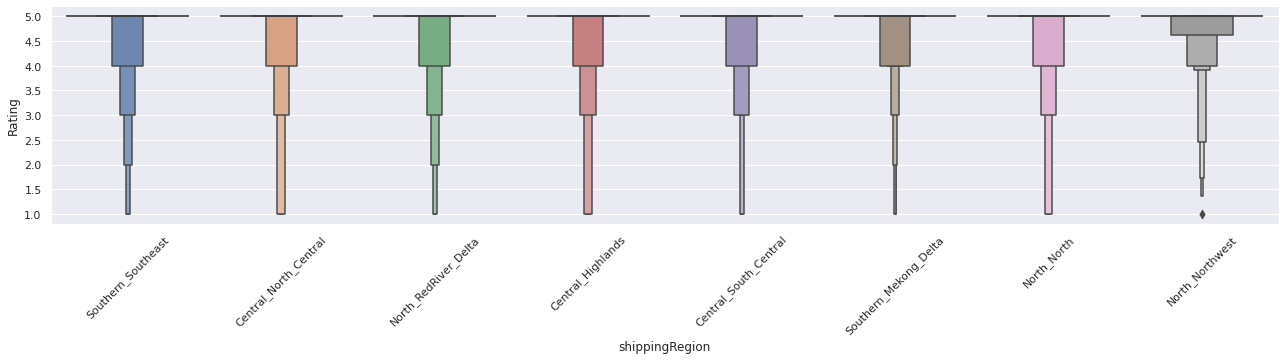

In [ ]:
# Ratings by Regions
sns.set(rc = {'figure.figsize':(22,4)})
sns.boxenplot(data=df3, x='shippingRegion', y='Rating', scale='exponential', k_depth='full')
plt.xticks(rotation=45)
plt.show()